#### Task a. Scraping using Beautiful Soup

In [ ]:
!pip install requests
!pip install html5lib
!pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
from bs4 import BeautifulSoup

URL = "https://quotes.toscrape.com/"
r = requests.get(URL)

soup = BeautifulSoup(r.content, 'html5lib')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Quotes to Scrape
  </title>
  <link href="/static/bootstrap.min.css" rel="stylesheet"/>
  <link href="/static/main.css" rel="stylesheet"/>
 </head>
 <body>
  <div class="container">
   <div class="row header-box">
    <div class="col-md-8">
     <h1>
      <a href="/" style="text-decoration: none">
       Quotes to Scrape
      </a>
     </h1>
    </div>
    <div class="col-md-4">
     <p>
      <a href="/login">
       Login
      </a>
     </p>
    </div>
   </div>
   <div class="row">
    <div class="col-md-8">
     <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
      <span class="text" itemprop="text">
       “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
      </span>
      <span>
       by
       <small class="author" itemprop="author">
        Albert Einstein
       </small>
       <a href="/author/Albert

In [ ]:
div_tags= soup.find_all('div', class_='quote')
len(div_tags)

10

In [ ]:
def get_data(div_tags):
  quotes=[]
  authors=[]
  name_tags=[]
  author_links=[]

  for tag in div_tags:
    quote= tag.find('span', class_='text').text
    quotes.append(quote)

    span_tag=tag.find('span',class_=None)
    author=span_tag.find('small',class_='author').text
    authors.append(author)

    name_tagged=tag.find('div', class_='tags').meta['content']
    name_tags.append(name_tagged)

    span_tag= tag.find('span', class_=None)
    author_link='http://quotes.toscrape.com'+span_tag.find('a')['href']
    author_links.append(author_link)

  return quotes, authors, name_tags, author_links

quotes, authors, name_tags, author_links= get_data(div_tags)

In [ ]:
def list_of_dict(quotes_list,author_names,urls,subject_names):
    return [{'Quotes': quotes_list[i],
             'Author': author_names[i],
             'Tags': subject_names[i],
             'Link': urls[i]} for i in range(len(quotes_list))] 

quotes_dict=list_of_dict(quotes,authors,author_links,name_tags)

In [ ]:
import pandas as pd
df=pd.DataFrame(quotes_dict)
df.to_csv('quote.csv',index=None)

In [ ]:
pd.read_csv('quote.csv').head(10)

,Quotes,Author,Tags,Link
0,“The world as we have created it is a process ...,Albert Einstein,"change,deep-thoughts,thinking,world",http://quotes.toscrape.com/author/Albert-Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities,choices",http://quotes.toscrape.com/author/J-K-Rowling
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational,life,live,miracle,miracles",http://quotes.toscrape.com/author/Albert-Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy,books,classic,humor",http://quotes.toscrape.com/author/Jane-Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself,inspirational",http://quotes.toscrape.com/author/Marilyn-Monroe
5,“Try not to become a man of success. Rather be...,Albert Einstein,"adulthood,success,value",http://quotes.toscrape.com/author/Albert-Einstein
6,“It is better to be hated for what you are tha...,André Gide,"life,love",http://quotes.toscrape.com/author/Andre-Gide
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison,"edison,failure,inspirational,paraphrased",http://quotes.toscrape.com/author/Thomas-A-Edison
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt,misattributed-eleanor-roosevelt,http://quotes.toscrape.com/author/Eleanor-Roos...
9,"“A day without sunshine is like, you know, nig...",Steve Martin,"humor,obvious,simile",http://quotes.toscrape.com/author/Steve-Martin


#### Task b. Extracting text from images tesseract

In [ ]:
!pip install pytesseract
!pip install tesseract
!sudo apt install tesseract-ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


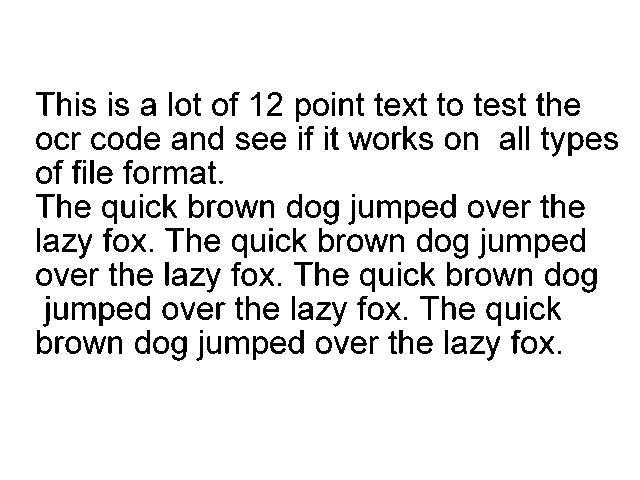

In [ ]:
# We import the necessary packages
#import the needed packages
import cv2
import os,argparse
import pytesseract
from PIL import Image
from skimage import io

#We then read the image with text
images=cv2.imread('/content/drive/MyDrive/NLP/testocr.png')
	
pytesseract.pytesseract.tesseract_cmd=('/usr/bin/tesseract')
text = pytesseract.image_to_string(images)
print(text)

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.



## Observations and Learning: 
I have understood the Beautiful soup library and how it can be used for web scraping. I have understood how to study the structure of the html, determine where the required data lies on the page and reference it to beautifulsoup for extraction.  <br>
I have also learnt about optical character recognition that can be used t extract textual and character data from images. I have understood about the tesseract library for the same. 